# Principal Component Analysis(PCA)
# 2018-08-08 Tobigs Week 04 Class 

In [3]:
# pip install watermark
%load_ext watermark
%watermark -v -p numpy,scipy,sklearn,pandas,matplotlib

CPython 3.7.4
IPython 7.14.0

numpy 1.19.1
scipy 1.5.2
sklearn 0.0
pandas 1.1.0
matplotlib 3.3.0


# PCA with Wine Data

In [4]:
# Set Up & Data Load 
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
'Alcalinity of ash', 'Magnesium', 'Total phenols', 
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
# Data Pre-processing - Data Partitioning
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.3, random_state=0)
        
        
# Data Pre-processing - Standardization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [7]:
# Eigendecomposition using Covariance Matrix
import numpy as np

cov_mat = np.cov(X_train_std.T)
# T : transpose of a matrix

eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)


## Explained variance ratio of eigenvalue
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
### calculating each result of eigenvalue / the sum of eigenvalue. Each result is the explained variance ratio of each eigenvalue
### showing which eigenvalue has the highest explanatory power as a percentage.

cum_var_exp = np.cumsum(var_exp) # a function that calculates the cumulative sum -> expressed in cumulative percentiles


Eigenvalues 
[4.8923083  2.46635032 1.42809973 1.01233462 0.84906459 0.60181514
 0.52251546 0.08414846 0.33051429 0.29595018 0.16831254 0.21432212
 0.2399553 ]


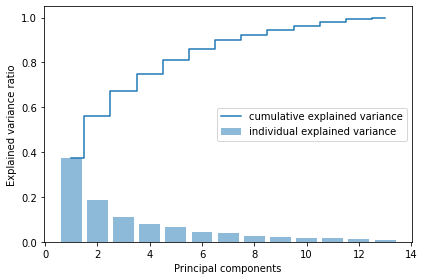

In [22]:
# Visualization for the explained variance ratio of eigenvalue
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/pca1.png', dpi=300)
plt.show()

In [9]:
# Projection Matrix Generation using Eigen Pairs
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
## eigen_pairs -> tuple

eigen_pairs.sort(reverse=True) # in descending order

w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
# projection matrix W : a projection matrix to reduce variables to two dimensions
# eigen_pair -> to reduce the dimension to only two eigen pairs
# hstack -> by concatenating two or more arrays with the same number of rows, an np array with an increased number of columns is created
# since hstack cannot be used for 1-d arrays, [:, np.newaxis] is added

print('Matrix W:\n', w)

Matrix W:
 [[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


In [10]:
# Feature Dimension Reduction with Projection Matrix
X_train_std[0].dot(w) # doc product of X_train_std[0] and W

X_train_pca = X_train_std.dot(w) # features multiplied by the projection matrix -> the result of the reduced features

C:\Users\lady1\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


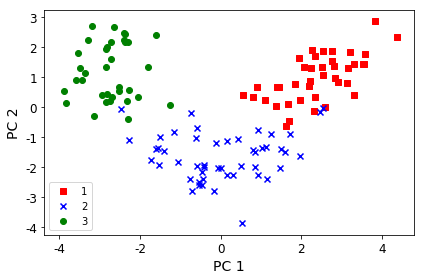

In [40]:
# Visualization for the transformed data
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], 
                X_train_pca[y_train==l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca2.png', dpi=300)
plt.show()

## Settings for assignments

In [23]:
# Python2, Python3
from __future__ import division, print_function, unicode_literals

# common
import numpy as np
import os

# seed
np.random.seed(10)

# settings for matplotlib
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# NanumBarunGothic font
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False

# 1. Random Data
## 3-D Dataset:

In [6]:
np.random.seed(10)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

print(X)

[[-0.95445059 -0.01086065 -0.1699832 ]
 [ 0.73465177 -0.29146034 -0.04005887]
 [-0.36813396  0.40479077  0.13946664]
 [-0.89140761  0.0859435  -0.00303781]
 [ 0.20035803  0.68670712  0.32673405]
 [ 1.09481108  0.2905039   0.16718968]
 [ 1.10591174  0.26528331  0.04808812]
 [-0.99460157 -0.02567148 -0.17505628]
 [ 1.15896887  0.26661108  0.24926869]
 [ 0.91980264  0.06473876  0.18579933]
 [-0.72023325  0.34941421  0.2553059 ]
 [-1.06159553 -0.50912371 -0.24717852]
 [ 0.70715167 -0.27298498  0.01328113]
 [ 0.06379665  0.66760012  0.18892982]
 [-1.09388932 -0.04784826 -0.16431636]
 [-0.39158442  0.51316362  0.19296816]
 [-0.83622881  0.15516704 -0.00172501]
 [ 1.04761983  0.48099738  0.22833325]
 [-1.10195686 -0.47395573 -0.36035214]
 [-0.77777477  0.20525801 -0.02850706]
 [-0.00912105  0.55769201  0.12729728]
 [ 1.19354573  0.10731078  0.27706518]
 [ 0.70698377  0.73331531  0.38540558]
 [-0.6387477   0.31524434 -0.07153254]
 [ 0.43641827  0.79922465  0.40012606]
 [ 0.48548711  0.77212975

# 2. PCA using Sklearn

## PCA is very simple in Sklearn. It also takes care of subtracting the average from the dataset:

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) # reduced to 2-D 
X2D = pca.fit_transform(X)

print(X2D)

[[ 122.24844185 -316.28214953]
 [1010.48162941 -290.08652456]
 [ -58.99409353  393.72230707]
 ...
 [-271.49586005  590.19752119]
 [-310.2111783  -116.60352762]
 [1058.8560426   -83.44732905]]


# PCA

C:\Users\lady1\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


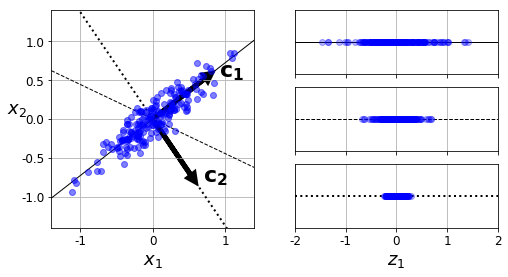

In [24]:
angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X = np.random.randn(m, 2) / 10
X = X.dot(np.array([[stretch, 0],[0, 1]])) # stretch
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # rotate

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi/6), np.sin(angle - 2 * np.pi/6)])
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)])

X_proj1 = X.dot(u1.reshape(-1, 1))
X_proj2 = X.dot(u2.reshape(-1, 1))
X_proj3 = X.dot(u3.reshape(-1, 1))

plt.figure(figsize=(8,4))
plt.subplot2grid((3,2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "k-", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "k--", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], "k:", linewidth=2)
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", fontsize=22)
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", fontsize=22)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot2grid((3,2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
plt.plot(X_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=1)
plt.plot(X_proj2[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

# MNIST Data
- https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat

In [12]:
from sklearn import datasets 
datasets.get_data_home() 

'/Users/yunho/scikit_learn_data'

In [14]:
from six.moves import urllib
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True) # data loading

In [15]:
from sklearn.model_selection import train_test_split

X = mnist["data"] 
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y) 

In [18]:
pca = PCA()
pca.fit(X_train) # fit train data to PCA 
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [27]:
d

154

In [28]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [37]:
pca.n_components_ # the number of principal components

154

In [29]:
np.sum(pca.explained_variance_ratio_)

0.9503623084769206

In [25]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [20]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

Text(0.5, 1.0, 'Recovered After Compression')

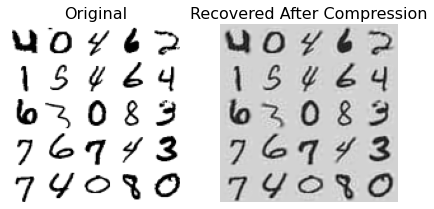

In [28]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Recovered After Compression", fontsize=16)

In [27]:
X_reduced_pca = X_reduced